[View in Colaboratory](https://colab.research.google.com/github/vikashkr117/machinelearningblr.github.io/blob/master/DNN1.ipynb)

In [2]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


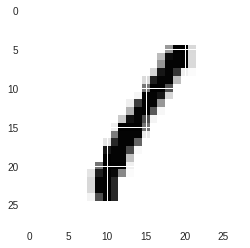

In [5]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[3])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [8]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [10]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [55]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
# Set the random seed
random_seed = 2

model = Sequential()

 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1))) # (3*3*32) + 32 
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 24))
model.add(Flatten())
model.add(Activation('softmax'))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  if __name__ == '__main__':


In [56]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_53 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 24, 24, 10)        330       
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 1, 1, 10)          57610     
_________________________________________________________________
flatten_12 (Flatten)         (None, 10)                0         
_________________________________________________________________
activation_11 (Activation)   (None, 10)                0         
Total params: 62,740
Trainable params: 62,740
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [58]:
model.fit(X_train, Y_train, batch_size=64, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 13s 212us/step - loss: 0.2079 - acc: 0.9411
Epoch 2/10
60000/60000 [==============================] - 12s 203us/step - loss: 0.0702 - acc: 0.9785
Epoch 3/10
30592/60000 [==============>...............] - ETA: 5s - loss: 0.0543 - acc: 0.9838

60000/60000 [==============================] - 12s 202us/step - loss: 0.0499 - acc: 0.9847
Epoch 4/10
60000/60000 [==============================] - 12s 201us/step - loss: 0.0403 - acc: 0.9878
Epoch 5/10
44160/60000 [=====================>........] - ETA: 3s - loss: 0.0316 - acc: 0.9900

60000/60000 [==============================] - 12s 205us/step - loss: 0.0323 - acc: 0.9898
Epoch 6/10
60000/60000 [==============================] - 12s 202us/step - loss: 0.0266 - acc: 0.9917
Epoch 7/10
49344/60000 [=======================>......] - ETA: 2s - loss: 0.0207 - acc: 0.9934

60000/60000 [==============================] - 12s 203us/step - loss: 0.0220 - acc: 0.9931
Epoch 8/10
60000/60000 [==============================] - 12s 204us/step - loss: 0.0169 - acc: 0.9943
Epoch 9/10
49600/60000 [=======================>......] - ETA: 2s - loss: 0.0141 - acc: 0.9954

60000/60000 [==============================] - 12s 203us/step - loss: 0.0145 - acc: 0.9951
Epoch 10/10
60000/60000 [==============================] - 12s 204us/step - loss: 0.0117 - acc: 0.9960


In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [60]:
print(score)

[0.06599474771624982, 0.9843]


In [0]:
y_pred = model.predict(X_test)

In [62]:
print(y_pred[:9])
print(y_test[:9])

[[1.5889132e-16 1.0139668e-15 2.1056874e-12 3.8904280e-10 5.7606499e-20
  5.6391019e-15 1.7493584e-24 1.0000000e+00 5.4817960e-12 2.2514965e-09]
 [6.9428919e-13 3.2308302e-11 1.0000000e+00 9.7884546e-16 2.4188737e-20
  6.0045080e-16 1.1681880e-09 4.8494238e-25 9.7701812e-15 1.6804729e-19]
 [3.3090215e-09 9.9997890e-01 2.5396312e-06 6.2736222e-10 8.7960916e-06
  1.7281113e-08 2.3695013e-09 1.9315641e-07 9.5654568e-06 4.8945408e-09]
 [1.0000000e+00 4.1624388e-16 1.5965615e-10 8.3915475e-13 2.4803888e-14
  1.1644468e-12 7.7512237e-09 2.9869209e-13 8.0640410e-13 1.1865730e-09]
 [1.9348171e-12 1.1342981e-16 2.1113979e-12 1.1747351e-12 9.9999988e-01
  3.9624741e-16 1.0111740e-15 1.6031250e-10 3.2599342e-08 8.3090043e-08]
 [1.9624735e-10 9.9997449e-01 7.8404085e-08 5.9703159e-11 8.4782214e-06
  4.4048383e-11 1.3070899e-10 1.4833314e-05 1.9820538e-06 2.2614596e-08]
 [3.2620705e-17 2.8275265e-10 1.4262084e-09 1.3857541e-14 9.9994814e-01
  1.9635908e-09 3.9120379e-20 3.3756371e-09 5.1866180e-05 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

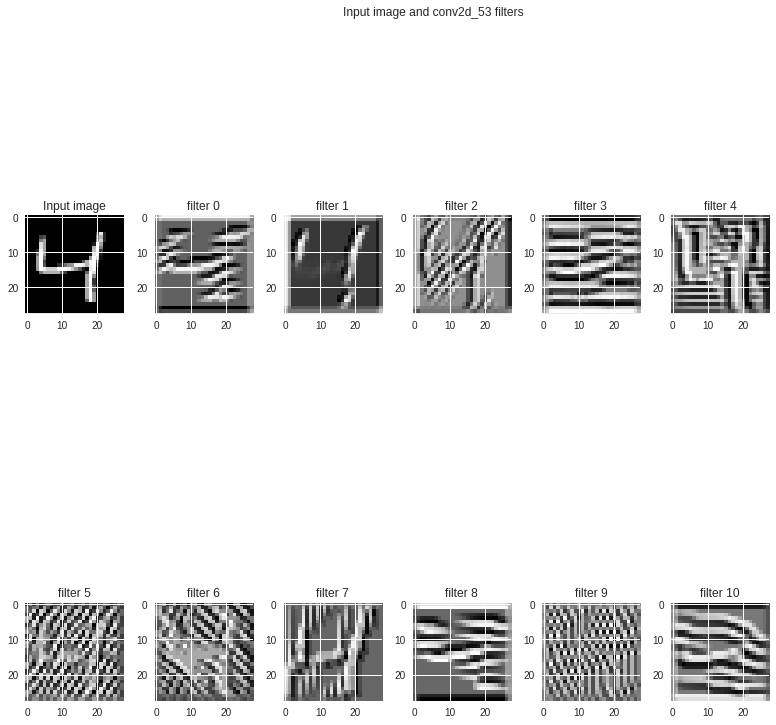

In [69]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_53'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()